# Vector Applications

## Correlation

#### Correlation is one of the most fundamental and important analysis methods in statistics and machine learning. A correlation coefficient is a single number that quantifies the linear relationship between two variables. Correlation coefficients range from −1 to +1, with −1 indicating a perfect negative relationship, +1 a perfect positive relationships, and 0 indicating no linear relationship. 

## Mean center each variable
#### Mean centering means to subtract the average value from each data value.

## Divide the dot product by the product of the vector norms

#### This divisive normalization cancels the measurement units and scales the maximum possible correlation magnitude to |1|.

## Cosine Similarity
#### Correlation is not the only way to assess similarity between two variables. Another method is called cosine similarity. The formula for cosine similarity is simply the geometric formula for the dot product.

- dot(X, y) / ||x|| ||y||



## k-Means Clustering
#### k-means clustering is an unsupervised method of classifying multivariate data into a relatively small number of groups, or categories, based on minimizing distance to the group center.

## Exercise 4-1.
#### Write a Python function that takes two vectors as input and provides two numbers as output: the Pearson correlation coefficient and the cosine similarity value. Write code that follows the formulas presented in this chapter; don’t simply call np.corrcoef and spatial.distance.cosine. Check that the two output values are identical when the variables are already mean centered and different when the variables are not mean centered.



In [1]:
import numpy as np

def pearson_cosine(x,y):
  
  mean_x, mean_y = np.mean(x), np.mean(y)
  
  centered_x = x- mean_x
  centered_y = y - mean_y
  
  numerator = np.sum(centered_x * centered_y)
  denominator = np.sqrt(np.sum(centered_x**2) * np.sum(centered_y**2))
  pearson_correlation = numerator / denominator
  
  dot_product = np.dot(x, y)
  mag_x, mag_y = np.linalg.norm(x), np.linalg.norm(y)
  
  cosine_similarity = dot_product/ (mag_x * mag_y)
  
  return pearson_correlation, cosine_similarity

x = np.array([1,2,3,4,5])
y = np.array([5,4,3,2,1])

pearson, cosine = pearson_cosine(x,y)

print(f"Pearson Correlation Coefficient: {pearson}")
print(f"Cosine Similarity: {cosine}")

Pearson Correlation Coefficient: -1.0
Cosine Similarity: 0.6363636363636364


## Exercise 4.2

#### Let’s continue exploring the difference between correlation and cosine similarity. Create a variable containing the integers 0 through 3, and a second variable equaling the first variable plus some offset. You will then create a simulation in which you systematically vary that offset between −50 and +50 (that is, the first iteration of the simulation will have the second variable equal to [−50, −49, −48, −47]). In a for loop, compute the correlation and cosine similarity between the two variables and store these results. Then make a line plot showing how the correlation and cosine similarity are affected by the mean offset. You should be able to reproduce Figure 4-4.

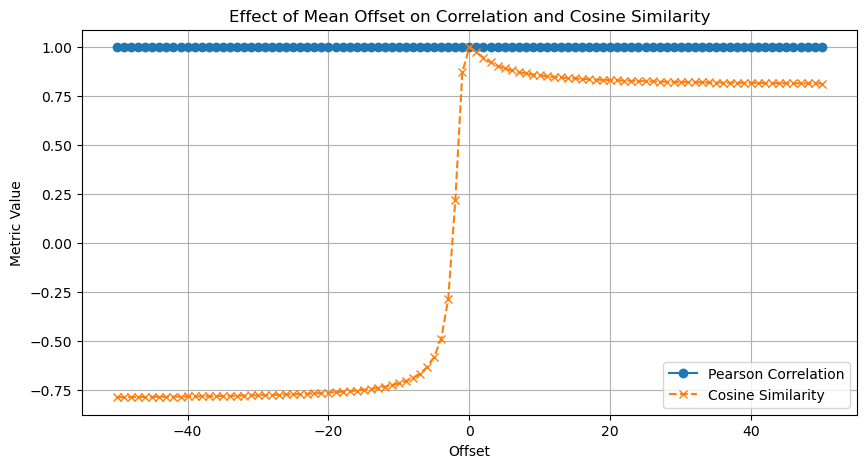

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def pearson_correlation(x, y):
    """Calculate Pearson correlation coefficient."""
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    return np.sum((x - mean_x) * (y - mean_y)) / np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

def cosine_similarity(x, y):
    """Calculate cosine similarity."""
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

x = np.arange(0, 4)

offsets = np.arange(-50, 51)

correlations = []
cosine_similarities = []

for offset in offsets:
    y = x + offset
    correlation = pearson_correlation(x, y)
    cosine_sim = cosine_similarity(x, y)
    correlations.append(correlation)
    cosine_similarities.append(cosine_sim)

plt.figure(figsize=(10, 5))
plt.plot(offsets, correlations, label='Pearson Correlation', marker='o')
plt.plot(offsets, cosine_similarities, label='Cosine Similarity', linestyle='--', marker='x')
plt.title('Effect of Mean Offset on Correlation and Cosine Similarity')
plt.xlabel('Offset')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

## Mean Offset

#### Mean Offset refers to a constant value added to each element of a dataset (or vector). In the context of this simulation, it modifies the baseline datax by adding a constant offset to create y. This shift changes the average (mean) of the data without altering its variability or the linear relationship between individual data points.

## Purpose and Insight:

#### The purpose of varying the mean offset and observing the effects on Pearson correlation and cosine similarity is to demonstrate that while Pearson correlation is unaffected by changes in the mean (it remains constant because it measures the strength and direction of a linear relationship relative to the means of the datasets), cosine similarity changes because it is sensitive to the actual values and their magnitude (which affects the angle between the two vectors).